### Data explanatory analysis
I will focus in exploring factors which affect  OR%   and CTR%
I will try to find the best emails subject lines in terms of OR%  and CTR%

In [165]:
# a code to open excel files as a dataframe 
!pip install openpyxl

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
%matplotlib inline


In [167]:
# reading excel file 
df=pd.read_excel("Promotional_emails_subject lines.xlsx")

In [168]:
df.head(2)

,Sent date,Q,DD,Category name,Main vs REM,Subject,Sendings,OR clean %,CTR clean %
0,2024-06-03,Q2,Saturday,NL Final,REM,Vill du fortfarande höra från oss?,1830,0.0246,1.9333
1,2024-05-27,Q2,Saturday,NL Interval,MAIN,Vill du fortfarande höra från oss?,3045,0.0355,1.5000


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sent date      1284 non-null   datetime64[ns]
 1   Q              1284 non-null   object        
 2   DD             1284 non-null   object        
 3   Category name  1284 non-null   object        
 4   Main vs REM    1284 non-null   object        
 5   Subject        1284 non-null   object        
 6   Sendings       1284 non-null   int64         
 7   OR clean %     1284 non-null   float64       
 8   CTR clean %    1282 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 90.4+ KB


In [ ]:
# the previous code shows that  there is only two rows with missing data so it is effecient to drop two
df = df.dropna()


In [171]:
 # invistigating the subject line column 
df['Subject'].value_counts().reset_index()

,Subject,count
0,Premiumtryck upp till 78% rabatt!,86
1,Dekorativ inredning för hemmet till de bästa p...,85
2,Personlig väggdekoration till fantastiska priser!,85
3,3 dagar - 4 produkter - upp till 76% rabatt!,78
4,✨ 3 Canvastavlor | 2 dagar | Upp till 54% rabatt!,77
5,Missa inte - Fotopresenter från endast 59 kr!,76
6,Skynda dig! Väggdekor från endast 39kr!,76
7,(72h) Upp till 65% rabatt på Väggdekorationer!,75
8,Skynda dig | -54% på XXL-Canvastavla!,75
9,WOW! Canvastavla 80x60cm för 189 kr,63


I noticed that there is a repetition  for two subject line , but with minor typing mistake , so i merege the similar subject line in one group , because its the same subject line 


In [172]:
#merging the similar two subject lines 
df['Subject'] = df['Subject'].str.replace('Otroligt ✨3 XXL-format för 249 kr styck', 'Otroligt ✨ 3 XXL-format för 249 kr styck', regex=False)

In [173]:
#mergig the two subject lines 
df['Subject'] = df['Subject'].str.replace('Använd din kod HA0PJLXC &#x1f525; | Spara nu!', 'Använd din kod 39GX32V0 &#x1f525; | Spara nu!', regex=False)

### Now, I will get a list of the unique subject lines , later I will engineer features 


In [174]:
df['Subject'].value_counts().reset_index()

,Subject,count
0,Premiumtryck upp till 78% rabatt!,86
1,Otroligt ✨ 3 XXL-format för 249 kr styck,86
2,Dekorativ inredning för hemmet till de bästa p...,85
3,Personlig väggdekoration till fantastiska priser!,85
4,3 dagar - 4 produkter - upp till 76% rabatt!,78
5,✨ 3 Canvastavlor | 2 dagar | Upp till 54% rabatt!,77
6,Missa inte - Fotopresenter från endast 59 kr!,76
7,Skynda dig! Väggdekor från endast 39kr!,76
8,(72h) Upp till 65% rabatt på Väggdekorationer!,75
9,Skynda dig | -54% på XXL-Canvastavla!,75


Now I will find the  relation between the email subjects lines  and OR% ( Emails Open Rate )

In [175]:
df.groupby("Subject")['OR clean %'].mean().reset_index().sort_values(by="OR clean %", ascending=False)

,Subject,OR clean %
18,Canvastavla 100x75cm för bara 199 kr,0.157103
20,Dina bilder på Canvastavla eller Fotopresenter...,0.156415
27,Personlig väggdekoration till fantastiska priser!,0.148196
28,Premiumtryck upp till 78% rabatt!,0.148030
39,WOW! Canvastavla 80x60cm för 189 kr,0.145617
22,Hem och livsstil-produkter från 49 kr,0.145385
19,Dekorativ inredning för hemmet till de bästa p...,0.143896
16,3 format ➔ 3 dagar ➔ 1 pris,0.141211
25,Otroligt ✨ 3 XXL-format för 249 kr styck,0.140083
33,Upp till -63% på favorit Väggdekorationer!,0.123543


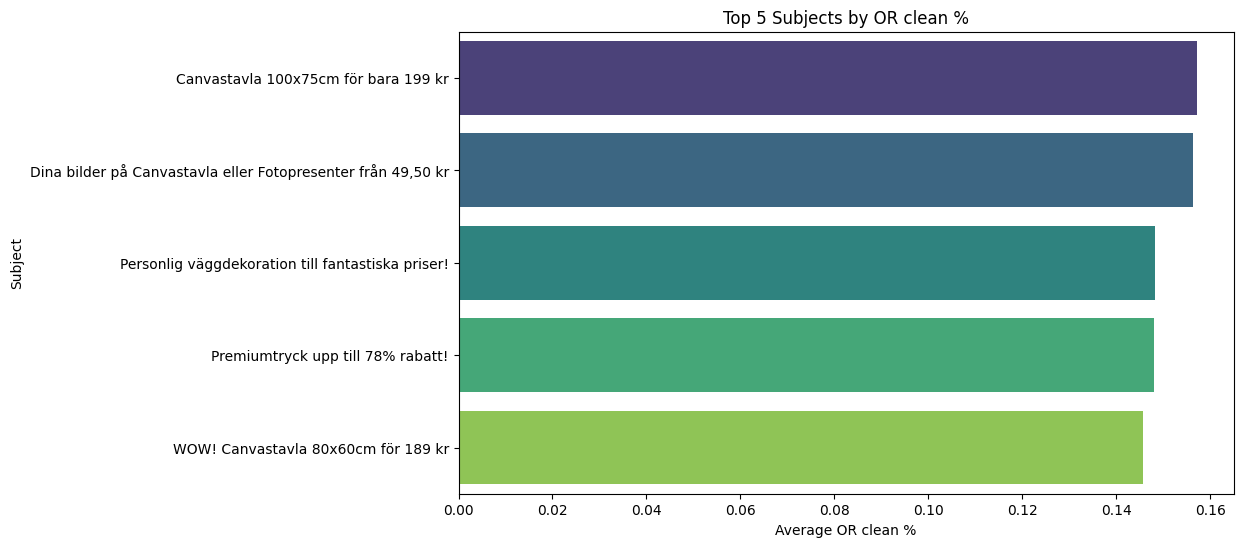

In [176]:

# I will make a chart for the best five subject lines in terms of OR%

top5 = df.groupby("Subject")['OR clean %'].mean().reset_index().sort_values(by="OR clean %", ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x='OR clean %', y='Subject', data=top5, palette='viridis')
plt.xlabel('Average OR clean %')
plt.ylabel('Subject')
plt.title('Top 5 Subjects by OR clean %')
plt.show()


Now I try to Summerize the relation between  emails subject lines and CTR%( Click through Rate )

In [177]:
df.groupby("Subject")["CTR clean %"].mean().reset_index().sort_values(by="CTR clean %", ascending=False)

,Subject,CTR clean %
38,Vill du fortfarande höra från oss?,1.716650
37,Vi kommer snart att radera dig från mailinglis...,1.320000
21,"En hemlig erbjudande bara för dig, skynda! &#x...",0.218100
10,&#x23f0; Avslöja dolda rabatter: Din mystiska ...,0.189800
26,Otroligt! Upp till 84% rabatt + 25% MER den 2 ...,0.184467
29,"Sista chansen: Priser från 30,80 kr - Erbjudan...",0.169600
17,Använd din kod 39GX32V0 &#x1f525; | Spara nu!,0.149540
24,Mystisk försäljning: Vad är din hemliga rabatt...,0.145180
31,"Skynda dig! Ju större Canvas, desto större rab...",0.141900
2,&#x1f385;&#x1f3fb; Din hemliga rabatt går snar...,0.138600


In the previous table , the first two rows have unlogigal values  , CTR cannot be more than 1 in this contex , I think its a mistake in data collection , so I will delete the first two rows . beside it is not considered as promotional emails 

In [178]:
# deleting two rows from the datafram 
df = df[~df['Subject'].isin(['Vill du fortfarande höra från oss?', 'Vi kommer snart att radera dig från mailinglistan!'])]

Now I will check if there is any outliers values in ( OR% , CTR% )

In [179]:
# afunction to check outliers 

def detect_outliers_in_column_table(df, col):
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in DataFrame.")
    
    Q1 = df[col].quantile(0.10)
    Q3 = df[col].quantile(0.90)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].copy()
    
    # Optional: Add a column showing the outlier value clearly
    outliers['outlier_value'] = outliers[col]
    
    return outliers



In [180]:

outliers_OR = detect_outliers_in_column_table(df, "OR clean %")
display(outliers_OR)  


,Sent date,Q,DD,Category name,Main vs REM,Subject,Sendings,OR clean %,CTR clean %,outlier_value
111,2024-03-01,Q1,Wednesday,NL Interval,MAIN,Personlig väggdekoration till fantastiska priser!,300,0.32,0.125,0.32


In [181]:
outliers_CTR = detect_outliers_in_column_table(df, "CTR clean %")
display(outliers_CTR)  

,Sent date,Q,DD,Category name,Main vs REM,Subject,Sendings,OR clean %,CTR clean %,outlier_value
3,2024-11-01,Q4,Wednesday,NL Interval,MAIN,Premiumtryck upp till 78% rabatt!,333,0.2342,0.3462,0.3462
4,2024-08-02,Q3,Wednesday,NL Interval,MAIN,Dekorativ inredning för hemmet till de bästa p...,246,0.2927,0.3333,0.3333
5,2024-12-07,Q4,Thursday,NL Final,MAIN,Mystisk försäljning: Vad är din hemliga rabatt...,8985,0.1028,0.2857,0.2857
6,2024-12-02,Q4,Saturday,NL Final,MAIN,Otroligt! Upp till 84% rabatt + 25% MER den 2 ...,8934,0.1085,0.2570,0.2570
7,2024-02-01,Q1,Wednesday,NL Interval,MAIN,Premiumtryck upp till 78% rabatt!,3285,0.0365,0.2500,0.2500
8,2024-12-09,Q4,Saturday,NL Final,REM,"En hemlig erbjudande bara för dig, skynda! &#x...",72429,0.1033,0.2491,0.2491
9,2024-02-01,Q1,Wednesday,NL Interval,MAIN,Otroligt ✨ 3 XXL-format för 249 kr styck,2358,0.0318,0.2400,0.2400


There is few outliers values in both OR% and CTR% , this should be revised and make sure it is not a mistake in data collection , I will leave it here because I am doing explanatory data analysis , and I will do any model now !

next , Creating a chart for the relation between email subject lines  and the CTR% ( after deleting the unlogical two rows )

In [182]:
df.groupby("Subject")["CTR clean %"].mean().reset_index().sort_values(by="CTR clean %", ascending=False)

,Subject,CTR clean %
21,"En hemlig erbjudande bara för dig, skynda! &#x...",0.218100
10,&#x23f0; Avslöja dolda rabatter: Din mystiska ...,0.189800
26,Otroligt! Upp till 84% rabatt + 25% MER den 2 ...,0.184467
29,"Sista chansen: Priser från 30,80 kr - Erbjudan...",0.169600
17,Använd din kod 39GX32V0 &#x1f525; | Spara nu!,0.149540
24,Mystisk försäljning: Vad är din hemliga rabatt...,0.145180
31,"Skynda dig! Ju större Canvas, desto större rab...",0.141900
2,&#x1f385;&#x1f3fb; Din hemliga rabatt går snar...,0.138600
9,&#x1f92b; Tiden håller på att rinna ut! Myster...,0.137350
8,&#x1f6a8; Bara två dagar kvar av Black Week Me...,0.128500


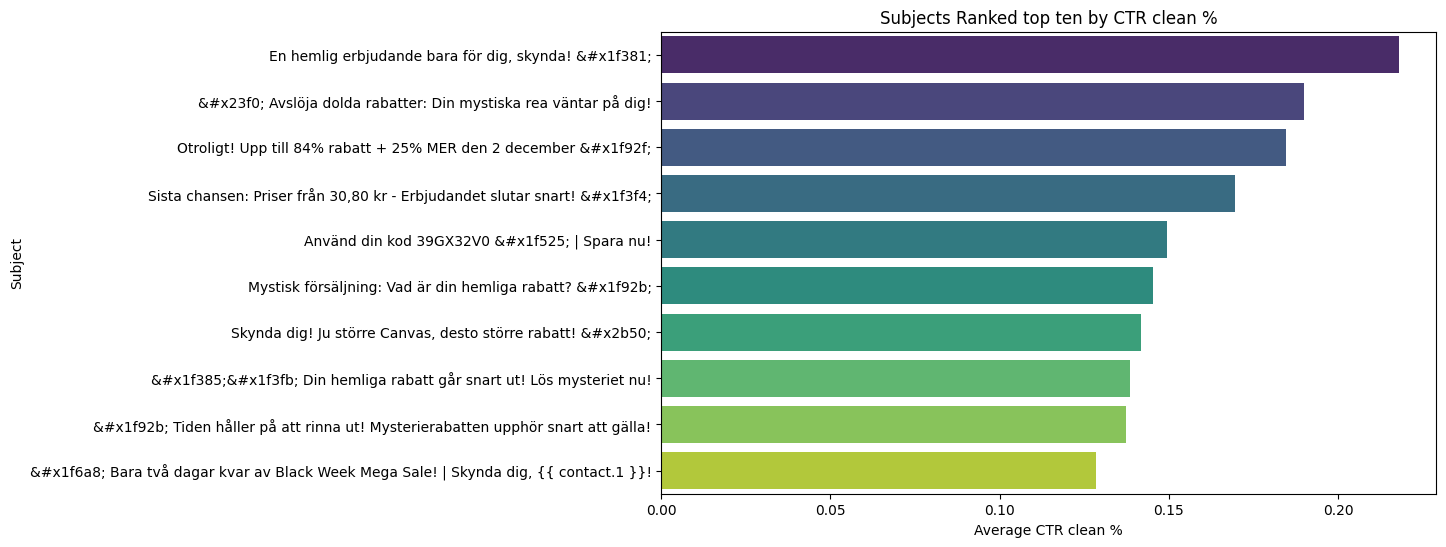

In [183]:
#  a chart for the top best subject lines interms of CTR percentage 
sorted_ctr = df.groupby("Subject")["CTR clean %"].mean().reset_index().sort_values(by="CTR clean %", ascending=False)
subset_ctr = sorted_ctr.iloc[0:10]

plt.figure(figsize=(10,6))
sns.barplot(x='CTR clean %', y='Subject', data=subset_ctr, palette='viridis')
plt.xlabel('Average CTR clean %')
plt.ylabel('Subject')
plt.title('Subjects Ranked top ten by CTR clean %')
plt.show()

Now I will investigate the relation between ( OR% , CTR% ) , and Time ( Quarters , Months , Days of week ) to see if there is any Time series patterns

In [184]:
#converting date column to a date datatype 
df['Date'] = pd.to_datetime(df['Sent date'])

In [185]:
# create a month colume
df['Month'] = df['Date'].dt.month


In [186]:
# OR% for each day of the week
df.groupby("DD")['OR clean %'].mean().reset_index().sort_values(by='OR clean %', ascending=False)

,DD,OR clean %
1,Monday,0.139409
0,Friday,0.134863
6,Wednesday,0.132572
3,Sunday,0.120727
2,Saturday,0.107914
5,Tuesday,0.105241
4,Thursday,0.100308


I can not see any relation between day of the weak and OR% 
- This analysis needs more historical data  
- Confirming  that emails are sent the same hour of the day
- Confirming that all subject lines are sent in diffent  weak days 
If after all conditions , still there is no relation , so there might be no relation !!

In [187]:
df.groupby("DD")["CTR clean %"].mean().reset_index().sort_values(by="CTR clean %", ascending=False)

,DD,CTR clean %
2,Saturday,0.111690
4,Thursday,0.090538
6,Wednesday,0.080502
5,Tuesday,0.074752
3,Sunday,0.074537
0,Friday,0.065139
1,Monday,0.053373


Saturday is the best day to send emails in terms of CTR%
Monday is the worst day to send emails in terms of CTR%
But there is two conditions must be confirmed 
- first , all emails sent in the same hour of the day 
- Seconf , all subject lines sent in all day weaks 

### Now investegating the monthly performance of OR% and CTR%

In [188]:
# OR% performance per month
df.groupby("Month")['OR clean %'].mean().reset_index().sort_values(by='OR clean %', ascending=False)

,Month,OR clean %
0,1,0.156156
2,3,0.147614
1,2,0.146441
3,4,0.136638
4,5,0.127082
6,7,0.126071
8,9,0.123762
7,8,0.123463
5,6,0.121793
9,10,0.121372


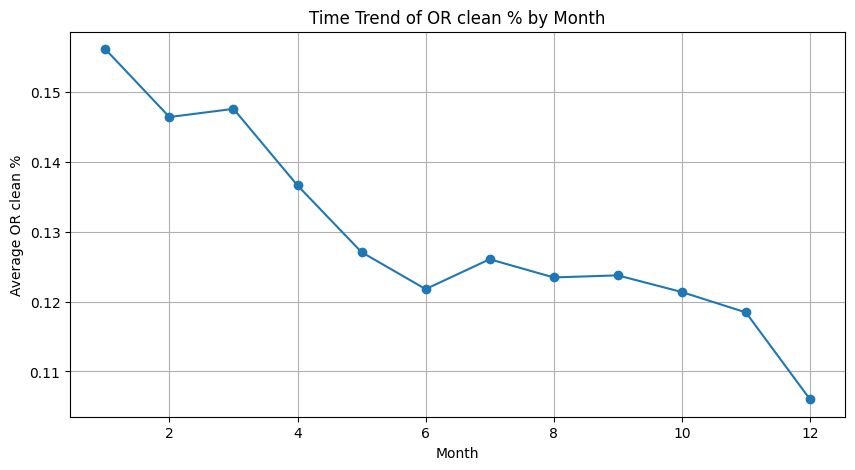

In [189]:


# Group, average, and sort by Month in ascending order
trend_df = df.groupby("Month")['OR clean %'].mean().reset_index().sort_values(by='Month')

# Plot the trend
plt.figure(figsize=(10,5))
plt.plot(trend_df['Month'], trend_df['OR clean %'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average OR clean %')
plt.title('Time Trend of OR clean % by Month')
plt.grid(True)
plt.show()


There a clear trend shows a drawback in terms of OR%

In [190]:
#CTR performance per month
df.groupby("Month")["CTR clean %"].mean().reset_index().sort_values(by="CTR clean %", ascending=False)

,Month,CTR clean %
11,12,0.085439
10,11,0.080989
6,7,0.079540
8,9,0.077084
9,10,0.076265
7,8,0.074441
3,4,0.073696
5,6,0.071820
4,5,0.071026
1,2,0.068361


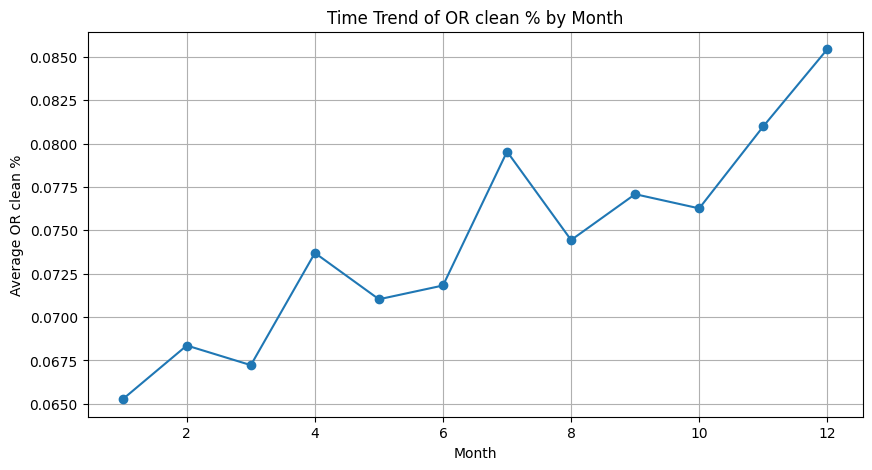

In [191]:
# Group, average, and sort by Month in ascending order
trend_df = df.groupby("Month")["CTR clean %"].mean().reset_index().sort_values(by='Month')

# Plot the trend
plt.figure(figsize=(10,5))
plt.plot(trend_df['Month'], trend_df["CTR clean %"], marker='o')
plt.xlabel('Month')
plt.ylabel('Average OR clean %')
plt.title('Time Trend of OR clean % by Month')
plt.grid(True)
plt.show()

The previous chart shows improvment in terms of CTR  

Next analying  the Quartly performance 

In [192]:
df.groupby("Q")['OR clean %'].mean().reset_index().sort_values(by="OR clean %", ascending=False)

,Q,OR clean %
0,Q1,0.150103
1,Q2,0.128147
2,Q3,0.124452
3,Q4,0.114509


In [193]:
df.groupby("Q")["CTR clean %"].mean().reset_index().sort_values(by="CTR clean %", ascending=False)

,Q,CTR clean %
3,Q4,0.081315
2,Q3,0.077043
1,Q2,0.072140
0,Q1,0.066927


The Qwarterly performance is another expression for the same monthely performance trend !

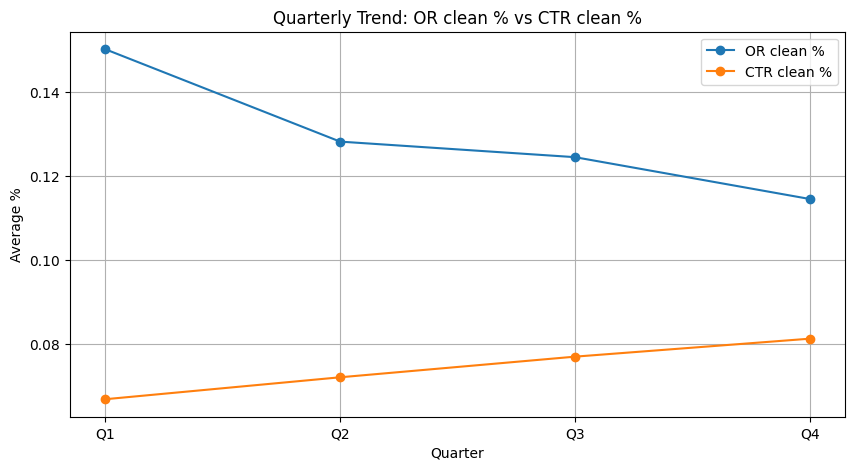

In [194]:
import matplotlib.pyplot as plt

# Calculate quarterly averages for both metrics
trend_df = df.groupby("Q")[['OR clean %', 'CTR clean %']].mean().reset_index()

# Sort by quarter (ascending for correct trend order)
trend_df = trend_df.sort_values(by="Q")

# Plot both trends
plt.figure(figsize=(10,5))
plt.plot(trend_df['Q'], trend_df['OR clean %'], marker='o', label='OR clean %')
plt.plot(trend_df['Q'], trend_df['CTR clean %'], marker='o', label='CTR clean %')

plt.xlabel('Quarter')
plt.ylabel('Average %')
plt.title('Quarterly Trend: OR clean % vs CTR clean %')
plt.grid(True)
plt.legend()
plt.show()


The quartly analysis of both OR and CTR shows similar result to the monthly performance as expected

--------------------------------------------------------------------------------------------------------

Understanding the correlation between emails numbers and OR% , and CTR%

In [195]:
df['Sendings'].corr(df['OR clean %'])

-0.3839078459126283

In [196]:
df['Sendings'].corr(df['CTR clean %'])

-0.39902151472768804

There is a correlation between (OR% / CTR%) and the volume of sending emails 

I prepared a sheet which explains  the features for each subject , in terms of ( number of words , tone , having emoji or not , included price or discount , personalization ) 
I will merge this (subject features sheet) to the current dataframe , so I will have one datafram containning all features 

In [197]:
subjects_features=pd.read_excel("subject_features1.xlsx")

In [198]:
subjects_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subject            39 non-null     object
 1   translation        39 non-null     object
 2   length of subject  39 non-null     int64 
 3   Personalization    39 non-null     int64 
 4   Emoji              39 non-null     int64 
 5   Urgency            39 non-null     int64 
 6   Tone               39 non-null     int64 
 7   Price or Discount  39 non-null     int64 
 8   imperative         39 non-null     int64 
 9   product            39 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 3.2+ KB


In [199]:
# construction a dataframe of emials subjects features and (OR / CTR ) precentages 
merged_df = df.merge(subjects_features, on='Subject', how='left')  


In [200]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sent date          1279 non-null   datetime64[ns]
 1   Q                  1279 non-null   object        
 2   DD                 1279 non-null   object        
 3   Category name      1279 non-null   object        
 4   Main vs REM        1279 non-null   object        
 5   Subject            1279 non-null   object        
 6   Sendings           1279 non-null   int64         
 7   OR clean %         1279 non-null   float64       
 8   CTR clean %        1279 non-null   float64       
 9   Date               1279 non-null   datetime64[ns]
 10  Month              1279 non-null   int32         
 11  translation        1279 non-null   object        
 12  length of subject  1279 non-null   int64         
 13  Personalization    1279 non-null   int64         
 14  Emoji   

In [201]:
merged_df.head(2)

,Sent date,Q,DD,Category name,Main vs REM,Subject,Sendings,OR clean %,CTR clean %,Date,Month,translation,length of subject,Personalization,Emoji,Urgency,Tone,Price or Discount,imperative,product
0,2024-11-01,Q4,Wednesday,NL Interval,MAIN,Premiumtryck upp till 78% rabatt!,333,0.2342,0.3462,2024-11-01,11,Premium prints up to 78% off!,0,0,0,0,0,1,0,1
1,2024-08-02,Q3,Wednesday,NL Interval,MAIN,Dekorativ inredning för hemmet till de bästa p...,246,0.2927,0.3333,2024-08-02,8,Decorative furnishings for the home at the bes...,0,0,0,0,0,0,0,1


#### Now I will study the effect of engeneered features on (OR% and CTR%)

##### 1-Personalization effect 


In [202]:

merged_df.groupby("Personalization").agg({
    'Sendings': 'sum',
    'OR clean %': 'mean'
}).reset_index().sort_values(by='Sendings', ascending=False)

,Personalization,Sendings,OR clean %
0,0,57768111,0.127625
1,1,262059,0.078100


In [203]:
merged_df.groupby("Personalization").agg({
    'Sendings': 'sum',
    'CTR clean %': 'mean'
}).reset_index().sort_values(by='Sendings', ascending=False)

,Personalization,Sendings,CTR clean %
0,0,57768111,0.075110
1,1,262059,0.086567


Although , there is a clear effect of personalization for OR% , but the volume of emails sent is not balanced in the two categories 

#### 2-Price or Discount effect

In [204]:
merged_df.groupby("Price or Discount").agg({
    'Sendings': 'sum',
    'OR clean %': 'mean'
}).reset_index().sort_values(by='Sendings', ascending=False)

,Price or Discount,Sendings,OR clean %
1,1,46714491,0.123431
0,0,11315679,0.138973


In [205]:
merged_df.groupby("Price or Discount").agg({
    'Sendings': 'sum',
    'CTR clean %': 'mean'
}).reset_index().sort_values(by='Sendings', ascending=False)

,Price or Discount,Sendings,CTR clean %
1,1,46714491,0.077003
0,0,11315679,0.069789


#### 3- Mentioning of Product effect

In [206]:
merged_df.groupby("product").agg({
    'Sendings': 'sum',
    'OR clean %': 'mean'
}).reset_index().sort_values(by='Sendings', ascending=False)

,product,Sendings,OR clean %
1,1,47062443,0.129019
0,0,10967727,0.121197


In [207]:
merged_df.groupby("product").agg({
    'Sendings': 'sum',
    'CTR clean %': 'mean'
}).reset_index().sort_values(by='Sendings', ascending=False)

,product,Sendings,CTR clean %
1,1,47062443,0.073638
0,0,10967727,0.080975


Finally , I will create a data file  to use to build a simple model to predict the OR rate and the CTR 
the features I will use to make predictions are ( the subject of email , month , day of week , number of emails sent )

In [208]:
merged_df.to_csv("model_data.csv", index=False)